In [ ]:
!pip3 install razdel
!pip3 install sentence-transformers

In [ ]:
import re
import seaborn as sns
import numpy as np

from scipy import spatial
from matplotlib import pyplot as plt

import razdel
from sentence_transformers import SentenceTransformer

In [ ]:
cat_ru_path = 'Cat_ru.txt'
cat_en_path = 'Cat_en.txt'

with open(cat_ru_path, 'r', encoding='utf-8') as f:
    cat_ru = f.read()
    print(cat_ru)

with open(cat_en_path, 'r', encoding='utf-8') as f:
    cat_en = f.read()
    print(cat_en)

В отеле было всего двое американцев. Они не знали ни кого из постояльцев с которыми 
встречались на лестнице по пути в свою комнату. Их комната находилась на втором этаже, 
стороной на море. Из нее так-же был виден городской сад с военным монументом в центре. В 
саду росли высокие пальмы и были расставлены зеленые скамейки. В хорошую погоду там 
всегда находился художник с мольбертом. Художнику нравился вид на пальмы и яркие фасады 
отелей обращенные в сторону сада и моря. Итальянцы прибывавшие из далека устраивали 
паломничество к обелиску. Он был сделан из бронзы и блестел от дождя. Шёл дождь. Струи 
ниспадали с пальмовых крон. Вода наполняла ёмкости по сторонам гравиевых дорожек. Море 
широким фронтом выплескивалось на берег и отступало чтобы снова пойти вперед сквозь 
пелену дождя. Автомобили исчезли, оставив пространство перед монументом пустым. 
Напротив, в двери кафе стоял скучающий офицант и обозревал пустую площадь.
Американская жена стояла у окна и смотрела наружу. Прямо под 

In [ ]:
ru = re.sub('\n', ' ', cat_ru)

en = re.sub('\n', ' ', cat_en)

sent_ru = list(x.text for x in razdel.sentenize(ru))
sent_en = list(x.text for x in razdel.sentenize(en))

In [ ]:
en

' THERE WERE only two Americans stopping at the hotel .  They did not know any of the people they passed on the  stairs on their way to and from their room . Their room was  on the second floor facing the sea . It also faced the public gar den and the war monument . There were big palms and green  benches in the public garden . In the good weather there was  always an artist with his easel . Artists liked the way the palms  grew and the bright colors of the hotels facing the gardens  and the sea . Italians came from a long way off to look up at  the war monument . It was made of bronze and glistened in  the rain . It was raining . The rain dripped from the palm trees .  Water stood in pools on the gravel paths . The sea broke in a  long line in the rain and slipped back down the beach to come  up and break again in a long line in the rain . The motor cars  were gone from the square by the war monument . Across the  square in the doorway of the café a waiter stood looking out at  the em

In [ ]:
sent_en

In [ ]:
print(f'en: {len(sent_en)} vs ru: {len(sent_ru)}')

en: 118 vs ru: 116


In [ ]:
def batch(iter1, iter2, batch_size):
    l1 = len(iter1)
    l2 = len(iter2)
    k = int(round(batch_size * l2/l1))
    kdx = 0 - k
    for ndx in range(0, l1, batch_size):
        kdx += k
        yield iter1[ndx:min(ndx + batch_size, l1)], iter2[kdx:min(kdx + k, l2)]

In [ ]:
#distiluse-base-multilingual-cased
#sentence-transformers/paraphrase-xlm-r-multilingual-v1

In [ ]:
model_st = SentenceTransformer('sentence-transformers/paraphrase-xlm-r-multilingual-v1')

In [ ]:
batch_number = 0
total_pairs = 0
batch_size = 10
window = 8
threshold = 0.3

In [ ]:
vectors1, vectors2 = [], []

for lines_en_batch, lines_ru_batch in batch(sent_en, sent_ru, batch_size):
    batch_number += 1
    vectors1 = [*vectors1, *model_st.encode(lines_en_batch)]
    vectors2 = [*vectors2, *model_st.encode(lines_ru_batch)]

In [ ]:
newline = '\n'
print(f'Тип: {vectors1[0].dtype}, Размерность: {vectors1[0].shape}, Число измерений: {vectors1[0].ndim}, {newline}{vectors1[4]}')

Тип: float32, Размерность: (768,), Число измерений: 1, 
[ 5.69574498e-02  7.32147992e-02  1.67893827e-01 -7.43427873e-02
 -3.48991007e-01  6.60228014e-01  1.44511983e-01 -6.37176707e-02
 -1.18644953e-01  7.70447031e-02  3.70568842e-01  1.95573959e-02
  2.61376917e-01 -1.48643777e-02  1.73451826e-02  4.76529300e-02
 -1.06436312e-01 -6.48000836e-02 -3.02825402e-02 -6.51735812e-02
  2.01856829e-02 -4.55838107e-02  1.13709574e-03 -2.71235466e-01
 -1.39726043e-01 -4.89815623e-02  4.81338389e-02 -5.45392670e-02
  3.02097887e-01  1.83548667e-02 -2.69555420e-01  4.19957712e-02
 -1.43679649e-01  4.77932319e-02  1.10753424e-01 -2.95593422e-02
  2.94462562e-01  1.96898162e-01  3.92694175e-01 -1.46675721e-01
  1.74909219e-01  2.21189111e-01  9.21487063e-02  1.30964786e-01
  1.19996242e-01  6.42958563e-03 -3.95495951e-01  1.37733102e-01
  1.35569692e-01 -7.97241256e-02  2.27070823e-01 -7.36870095e-02
  2.18189731e-01  3.73694003e-02 -1.97462775e-02 -2.90268864e-02
  1.52419508e-01 -4.63492014e-02  

In [ ]:
for lines_en_batch, lines_ru_batch in batch(sent_en, sent_ru, batch_size):
  print(lines_ru_batch)
  print(len(lines_ru_batch))
  print(lines_en_batch)
  print(len(lines_en_batch))

['В отеле было всего двое американцев.', 'Они не знали ни кого из постояльцев с которыми  встречались на лестнице по пути в свою комнату.', 'Их комната находилась на втором этаже,  стороной на море.', 'Из нее так-же был виден городской сад с военным монументом в центре.', 'В  саду росли высокие пальмы и были расставлены зеленые скамейки.', 'В хорошую погоду там  всегда находился художник с мольбертом.', 'Художнику нравился вид на пальмы и яркие фасады  отелей обращенные в сторону сада и моря.', 'Итальянцы прибывавшие из далека устраивали  паломничество к обелиску.', 'Он был сделан из бронзы и блестел от дождя.', 'Шёл дождь.']
10
['THERE WERE only two Americans stopping at the hotel .', 'They did not know any of the people they passed on the  stairs on their way to and from their room .', 'Their room was  on the second floor facing the sea .', 'It also faced the public gar den and the war monument .', 'There were big palms and green  benches in the public garden .', 'In the good weather

In [ ]:
def get_sim_matrix(vec1, vec2, window):
    sim_matrix=np.zeros((len(vec1), len(vec2)))#создается матрица, наполненная нулями
    k = len(vec1)/len(vec2)
    for i in range(len(vec1)):
        for j in range(len(vec2)):
            if (j*k > i-window) & (j*k < i+window):
              sim = 1 - spatial.distance.cosine(vec1[i], vec2[j])
              sim_matrix[i,j] = sim
    return sim_matrix

In [ ]:
sim_matrix = get_sim_matrix(vectors1, vectors2, window)

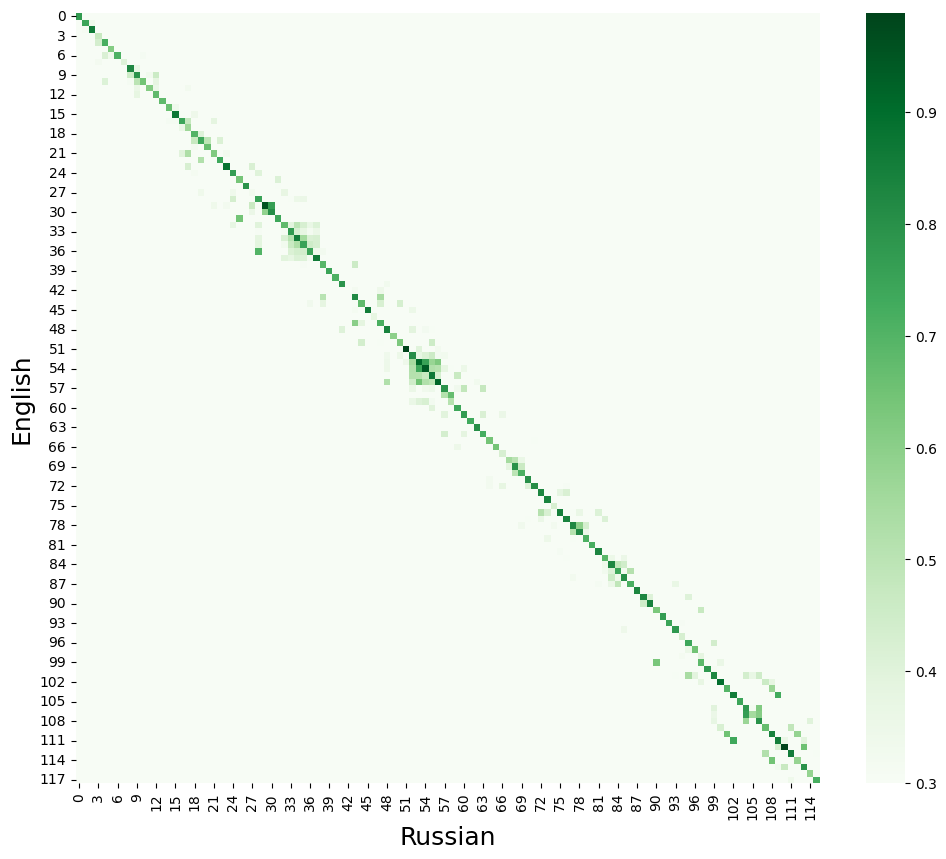

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(sim_matrix, cmap="Greens", vmin=threshold)
plt.xlabel("Russian", fontsize=18)
plt.ylabel("English", fontsize=18)
plt.show()

In [ ]:
sim_matrix_best = np.zeros_like(sim_matrix)
sim_matrix_best[range(len(sim_matrix)),
                sim_matrix.argmax(1)] = sim_matrix[range(len(sim_matrix)),
                                                   sim_matrix.argmax(1)
                ]

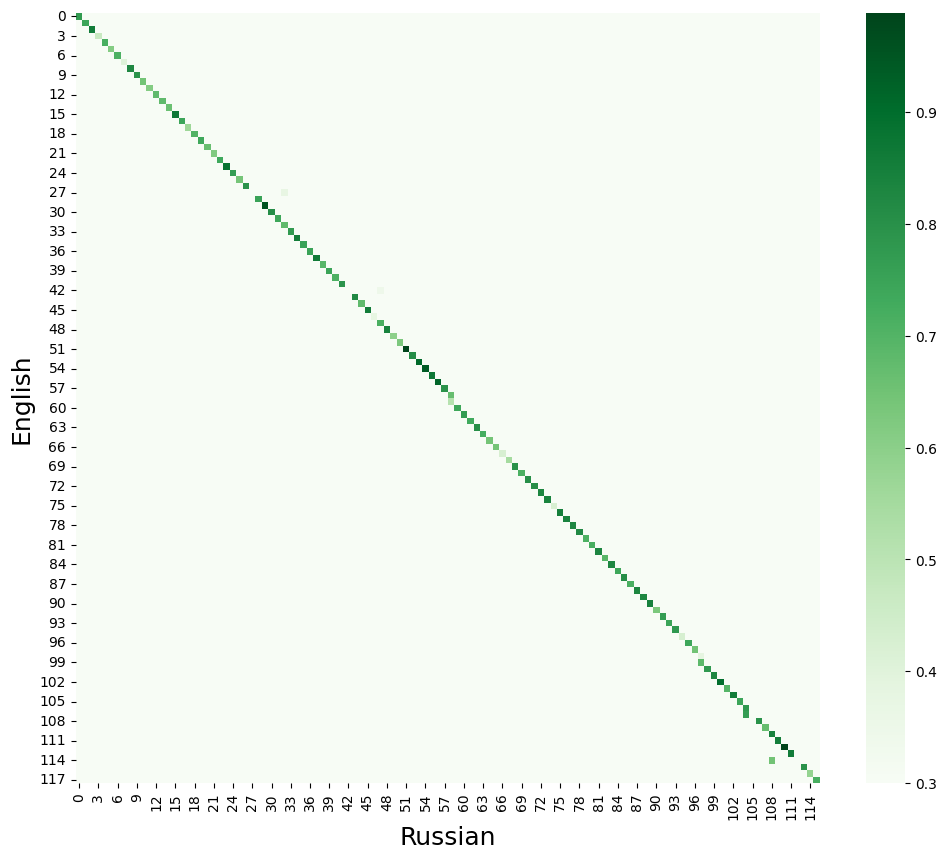

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(sim_matrix_best, cmap="Greens", vmin=threshold)
plt.xlabel("Russian", fontsize=18)
plt.ylabel("English", fontsize=18)
plt.show()

In [ ]:
def get_pairs(ru_lines, en_lines, sim_matrix, threshold):
    ru = []
    en = []
    sims = []
    for i in range(sim_matrix.shape[0]):
        for j in range(sim_matrix.shape[1]):
            if sim_matrix[i,j] >= threshold:
                ru.append(ru_lines[j])
                en.append(en_lines[i])
                sims.append(sim_matrix[i,j])
    return ru, en, sims

In [ ]:
res_ru, res_en, sims = get_pairs(sent_ru, sent_en, sim_matrix_best, threshold)

In [ ]:
for x, y, s in zip(res_ru, res_en, sims):
    print(x)
    print(y)
    print("")
    print(">> similarity", s, "\n\n")

В отеле было всего двое американцев.
THERE WERE only two Americans stopping at the hotel .

>> similarity 0.8411218523979187 


Они не знали ни кого из постояльцев с которыми  встречались на лестнице по пути в свою комнату.
They did not know any of the people they passed on the  stairs on their way to and from their room .

>> similarity 0.9086424112319946 


Их комната находилась на втором этаже,  стороной на море.
Their room was  on the second floor facing the sea .

>> similarity 0.9671823978424072 


Из нее так-же был виден городской сад с военным монументом в центре.
It also faced the public gar den and the war monument .

>> similarity 0.44663381576538086 


В  саду росли высокие пальмы и были расставлены зеленые скамейки.
There were big palms and green  benches in the public garden .

>> similarity 0.7380004525184631 


В хорошую погоду там  всегда находился художник с мольбертом.
In the good weather there was  always an artist with his easel .

>> similarity 0.9440183639526367 

In [ ]:
result = []

for x, y, s in zip(res_ru, res_en, sims):
    result.append(x)
    result.append(y)
    result.append(f'>> similarity {s}{newline}{newline}')
    print(x)
    print(y)
    print("")
    print(">> similarity", s, "\n\n")

В отеле было всего двое американцев.
THERE WERE only two Americans stopping at the hotel .

>> similarity 0.7706516981124878 


Они не знали ни кого из постояльцев с которыми  встречались на лестнице по пути в свою комнату.
They did not know any of the people they passed on the  stairs on their way to and from their room .

>> similarity 0.7445343136787415 


Их комната находилась на втором этаже,  стороной на море.
Their room was  on the second floor facing the sea .

>> similarity 0.8582884073257446 


Из нее так-же был виден городской сад с военным монументом в центре.
It also faced the public gar den and the war monument .

>> similarity 0.46975845098495483 


В  саду росли высокие пальмы и были расставлены зеленые скамейки.
There were big palms and green  benches in the public garden .

>> similarity 0.7172225713729858 


В хорошую погоду там  всегда находился художник с мольбертом.
In the good weather there was  always an artist with his easel .

>> similarity 0.6127910614013672 

In [ ]:
with open ('sentence_transformer_2.txt', 'w', encoding='utf-8') as f:
  res = '\n'.join(result)
  f.write(res)